# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#Analysis:
    
#Observed trend 1 --
#    The weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). 
    
#Observed trend 2 --
#    There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, and 100% cloudiness.
    
#Observed trend 3 -- 
#    The weather becomes significantly humid as one approaches the equator (0 Deg. Latitude).'''

## Generate Cities List

In [2]:
# Dependencies and Setup
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities 
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=b90c1c5ef1cb295a1e1ebef479e8c56c&units=metric&q=


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:

new_cities=[]

# set up lists to hold reponse info
lat = []
lng = []
temp_max_in_Celsius = []
humidity=[]
cloudiness=[]
country=[]
date=[]
wind_speed=[]

setn=1
idx=1

print("Beginning Data Retrieval")    
print("-----------------------------")

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    ###pprint(response)
    
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp_max_in_Celsius.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        wind_speed.append(response['wind']['speed'])
        
        
        new_cities.append(city)
        
        print(f"Processing Record {idx} of Set {setn} | {city}")
        idx = idx + 1
        if (setn == 1):
            if (idx == 51):
                setn = 2
                idx = 0
        else:
            if (idx == 50):
                setn = setn + 1
                idx = 0
        
    except KeyError:
        print("City not found. Skipping...")
        continue

        
temp_max_in_Fahreneit=[x*(9/5)+32 for x in temp_max_in_Celsius]


#Export the city data into a .csv.
# Dependencies
import os
import csv

# Specify the file to write to
output_path = os.path.join("..", "output.csv")

# Open the file using "write" mode. Specify the variable to hold the contents
with open(output_path, 'w', newline='') as csvfile:

    # Initialize csv.writer
    csvwriter = csv.writer(csvfile, delimiter=',')

    # Write the first row (column headers)
    csvwriter.writerow(['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed'])
    
    for i in range(len(new_cities)):

        # Write the second row
        csvwriter.writerow([new_cities[i], cloudiness[i], country[i], date[i], humidity[i], lat[i], lng[i], temp_max_in_Fahreneit[i], wind_speed[i]])
    


print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

print(f"City {len(new_cities)}")
print(f"Cloudiness {len(cloudiness)}")
print(f"Country {len(country)}")
print(f"Date {len(date)}")
print(f"Humidity {len(humidity)}")
print(f"Lat {len(lat)}")
print(f"Lng {len(lng)}")
print(f"Max Temp {len(temp_max_in_Celsius)}")
print(f"Wind Speed {len(wind_speed)}")

###########
# if you encounter a "year is out of range" error the timestamp
# may be in milliseconds, try `ts /= 1000` in that case

from datetime import datetime
#dtt1= [str(A1) for A1 in date]
#dtt2 =[int(A2) for A2 in dtt1]
#Date1=[datetime.utcfromtimestamp(A3).strftime('%Y-%m-%d %H:%M:%S') for A3 in dtt2]
#print(Date1)
############


dtt1 = date[1]
dtt2 = datetime.utcfromtimestamp(dtt1).strftime('%m/%d/%y')


# create a data frame from cities, lat, and temp

weather_dict = {
    'City': new_cities,
    'Cloudiness': cloudiness,
    'Country': country,
    'Date': date,
    'Humidity': humidity,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': temp_max_in_Fahreneit,
    'Wind Speed': wind_speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | tuni
City not found. Skipping...
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | itarema
Processing Record 5 of Set 1 | shakiso
City not found. Skipping...
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | wanaka
Processing Record 8 of Set 1 | broken hill
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | dillon
Processing Record 13 of Set 1 | saint-philippe
Processing Record 14 of Set 1 | kuryk
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | atar
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | avera
Processing Record 20 of Set 1 | kilindoni
Processing Record 21 of Set 1 | dikson
Processing Record 22 of Set 1 | kodiak
Processing R

Processing Record 37 of Set 4 | torbay
Processing Record 38 of Set 4 | yeppoon
Processing Record 39 of Set 4 | tatarsk
Processing Record 40 of Set 4 | isangel
Processing Record 41 of Set 4 | porsa
Processing Record 42 of Set 4 | moerai
Processing Record 43 of Set 4 | iqaluit
Processing Record 44 of Set 4 | nioro
Processing Record 45 of Set 4 | san cristobal
Processing Record 46 of Set 4 | port hardy
Processing Record 47 of Set 4 | bluefield
Processing Record 48 of Set 4 | jiangdu
Processing Record 49 of Set 4 | esperance
Processing Record 0 of Set 5 | san bernardo
Processing Record 1 of Set 5 | victoria
Processing Record 2 of Set 5 | bereda
City not found. Skipping...
Processing Record 3 of Set 5 | laguna
Processing Record 4 of Set 5 | linhares
Processing Record 5 of Set 5 | narsaq
Processing Record 6 of Set 5 | ariquemes
Processing Record 7 of Set 5 | uige
Processing Record 8 of Set 5 | bonavista
Processing Record 9 of Set 5 | broome
Processing Record 10 of Set 5 | bozuyuk
Processing 

Processing Record 25 of Set 8 | thompson
Processing Record 26 of Set 8 | mehamn
Processing Record 27 of Set 8 | alice
City not found. Skipping...
Processing Record 28 of Set 8 | naze
Processing Record 29 of Set 8 | fort frances
Processing Record 30 of Set 8 | ushtobe
Processing Record 31 of Set 8 | saint george
City not found. Skipping...
Processing Record 32 of Set 8 | aracaju
Processing Record 33 of Set 8 | never
Processing Record 34 of Set 8 | chumikan
Processing Record 35 of Set 8 | erenhot
Processing Record 36 of Set 8 | pervomayskiy
Processing Record 37 of Set 8 | beyneu
City not found. Skipping...
Processing Record 38 of Set 8 | ardakan
Processing Record 39 of Set 8 | pokrovsk
Processing Record 40 of Set 8 | cairns
City not found. Skipping...
Processing Record 41 of Set 8 | kahului
Processing Record 42 of Set 8 | helena
Processing Record 43 of Set 8 | husavik
Processing Record 44 of Set 8 | ust-uda
Processing Record 45 of Set 8 | balili
City not found. Skipping...
Processing Rec

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hobart,90,AU,1542004200,63,-42.88,147.33,60.800,7.20
1,tuni,44,BO,1542006000,80,-16.67,-68.14,39.200,1.00
2,mataura,92,NZ,1542006206,83,-46.19,168.86,53.924,3.38
3,itarema,88,BR,1542006880,91,-2.92,-39.92,76.334,5.28
4,shakiso,48,ET,1542006880,81,5.77,38.90,63.734,1.48


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

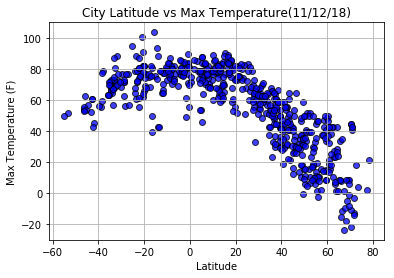

In [5]:
plt.title("City Latitude vs Max Temperature(" + dtt2 + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
    
plt.scatter(weather_data['Lat'], weather_data['Max Temp'] , marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.grid()

### Save Figure
plt.savefig("../Images/Latitude_vs_Temperature.png")

#### Latitude vs. Humidity Plot

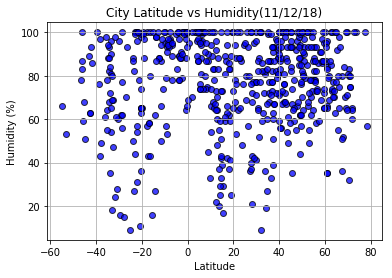

In [6]:
plt.title("City Latitude vs Humidity(" + dtt2 + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.scatter(weather_data['Lat'], weather_data['Humidity'] , marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.grid()

### Save Figure
plt.savefig("../Images/Latitude_vs_Humidity.png")

#### Latitude vs. Cloudiness Plot

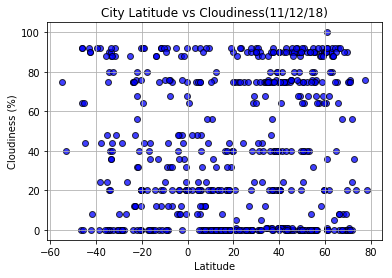

In [7]:
plt.title("City Latitude vs Cloudiness(" + dtt2 + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.scatter(weather_data['Lat'], weather_data['Cloudiness'] , marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.grid()

### Save Figure
plt.savefig("../Images/Latitude_vs_Cloudiness.png")

#### Latitude vs. Wind Speed Plot

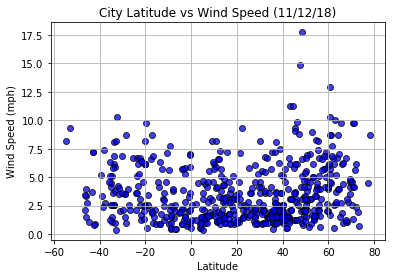

In [8]:
plt.title("City Latitude vs Wind Speed (" + dtt2 + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.scatter(weather_data['Lat'], weather_data['Wind Speed'] , marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.grid()

### Save Figure
plt.savefig("../Images/Latitude_vs_Wind_Speed.png")

In [9]:
# Analysis:
    
# Observed trend 1 --
#     The weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). 
    
# Observed trend 2 --
#     There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, and 100% cloudiness.
    
# Observed trend 3 -- 
#    The weather becomes significantly humid as one approaches the equator (0 Deg. Latitude).
